# In this nodebook, simple RNN and LTSM are used for spam detection

Have a look at this notebook for spam detection tutorial. (dataset is same ). Misclassifidation number is only 16 by logistic regression implemented here:  https://nbviewer.jupyter.org/gist/Juice178/6f5040fe6afc542c8db87ca865d2f21c

# 1 RNN

In [10]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [11]:
data = pd.read_csv("/content/emailspam.csv")

In [12]:
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [13]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500


# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

True
The number of training 4457, validation 1115 
Found 9004 unique words: 
data shape:  (5572, 500)


In [14]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 10s 130ms/step - loss: 0.3524 - acc: 0.8957 - val_loss: 0.1644 - val_acc: 0.9664
Epoch 2/10
60/60 [==============================] - 10s 166ms/step - loss: 0.1098 - acc: 0.9767 - val_loss: 0.0817 - val_acc: 0.9753
Epoch 3/10
60/60 [==============================] - 9s 146ms/step - loss: 0.0576 - acc: 0.9860 - val_loss: 0.0686 - val_acc: 0.9776
Epoch 4/10
60/60 [==============================] - 9s 143ms/step - loss: 0.0896 - acc: 0.9694 - val_loss: 0.0461 - val_acc: 0.9888
Epoch 5/10
60/60 [==============================] - 10s 161ms/step - loss: 0.0603 - acc: 0.9790 - val_loss: 0.5004 - val_acc: 0.7545
Epoch 6/10
60/60 [==============================] - 7s 121ms/step - loss: 0.0912 - acc: 0.9661 - val_loss: 0.0826 - val_acc: 0.9765
Epoch 7/10
60/60 [==============================] - 10s 165ms/step - loss: 0.0305 - acc: 0.9919 - val_loss: 0.0715 - val_acc: 0.9776
Epoch 8/10
60/60 [==============================] - 8s 139ms/step - loss

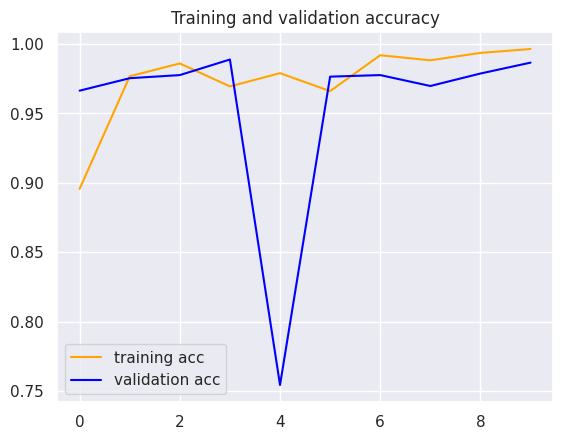

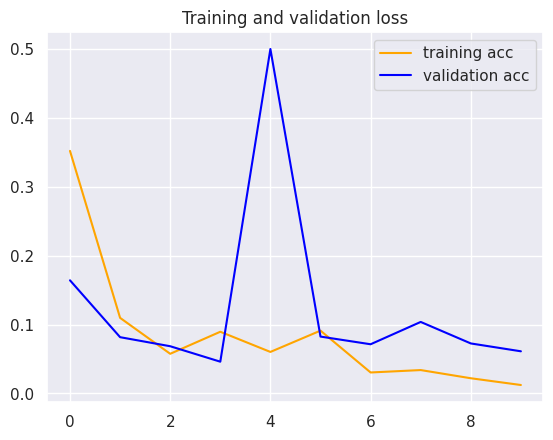

In [15]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
pred = (model.predict(texts_test) > 0.5).astype("int32")
acc = model.evaluate(texts_test, y_test)
proba_rnn = model.predict(texts_test)[:, 0]
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 1s 25ms/step
Test loss is 0.08 accuracy is 0.98  
[[956  19]
 [  5 135]]


# LTSM

In [18]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 23s 344ms/step - loss: 0.3512 - acc: 0.8687 - val_loss: 0.2161 - val_acc: 0.9776
Epoch 2/10
60/60 [==============================] - 19s 315ms/step - loss: 0.1291 - acc: 0.9708 - val_loss: 0.1185 - val_acc: 0.9664
Epoch 3/10
60/60 [==============================] - 17s 287ms/step - loss: 0.0698 - acc: 0.9823 - val_loss: 0.0653 - val_acc: 0.9821
Epoch 4/10
60/60 [==============================] - 18s 300ms/step - loss: 0.0441 - acc: 0.9905 - val_loss: 0.0615 - val_acc: 0.9854
Epoch 5/10
60/60 [==============================] - 20s 333ms/step - loss: 0.0320 - acc: 0.9930 - val_loss: 0.0645 - val_acc: 0.9832
Epoch 6/10
60/60 [==============================] - 18s 304ms/step - loss: 0.1043 - acc: 0.9610 - val_loss: 0.0852 - val_acc: 0.9809
Epoch 7/10
60/60 [==============================] - 18s 294ms/step - loss: 0.3213 - acc: 0.8710 - val_loss: 0.4289 - val_acc: 0.7915
Epoch 8/10
60/60 [==============================] - 18s 298ms/step - 

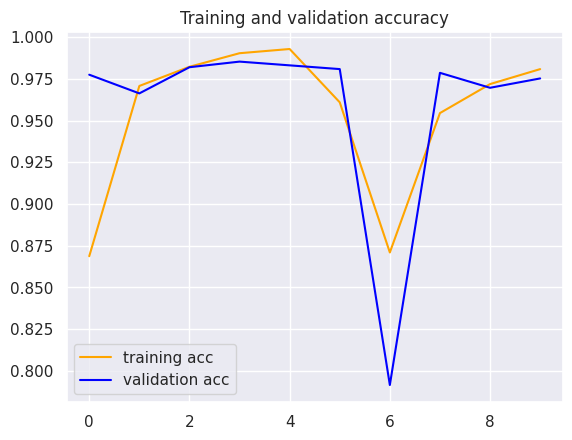

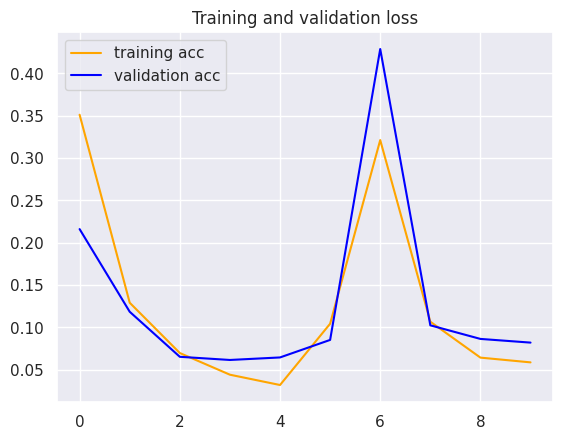

In [19]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
pred = (model.predict(texts_test) > 0.5).astype("int32")
acc = model.evaluate(texts_test, y_test)
proba_rnn = model.predict(texts_test)[:, 0]
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 3s 75ms/step
Test loss is 0.10 accuracy is 0.97  
[[947  19]
 [ 14 135]]


# Ensemble method (combining RNN and LTSM)

In [23]:
proba_ltsm = model.predict(texts_test).flatten()
ensemble_proba = 0.3 * proba_rnn + 0.7 * proba_ltsm

35/35 [==============================] - 1s 42ms/step


In [24]:
ensemble_proba[:5]

array([0.00540245, 0.00238333, 0.00245962, 0.00203128, 0.0025991 ],
      dtype=float32)

In [25]:
ensemble_class = np.array([1 if i >= 0.5 else 0 for i in ensemble_proba])

In [26]:
ensemble_class[:5]

array([0, 0, 0, 0, 0])

In [27]:
print(confusion_matrix(pred, y_test))

[[947  19]
 [ 14 135]]
